In [7]:
! pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
! pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


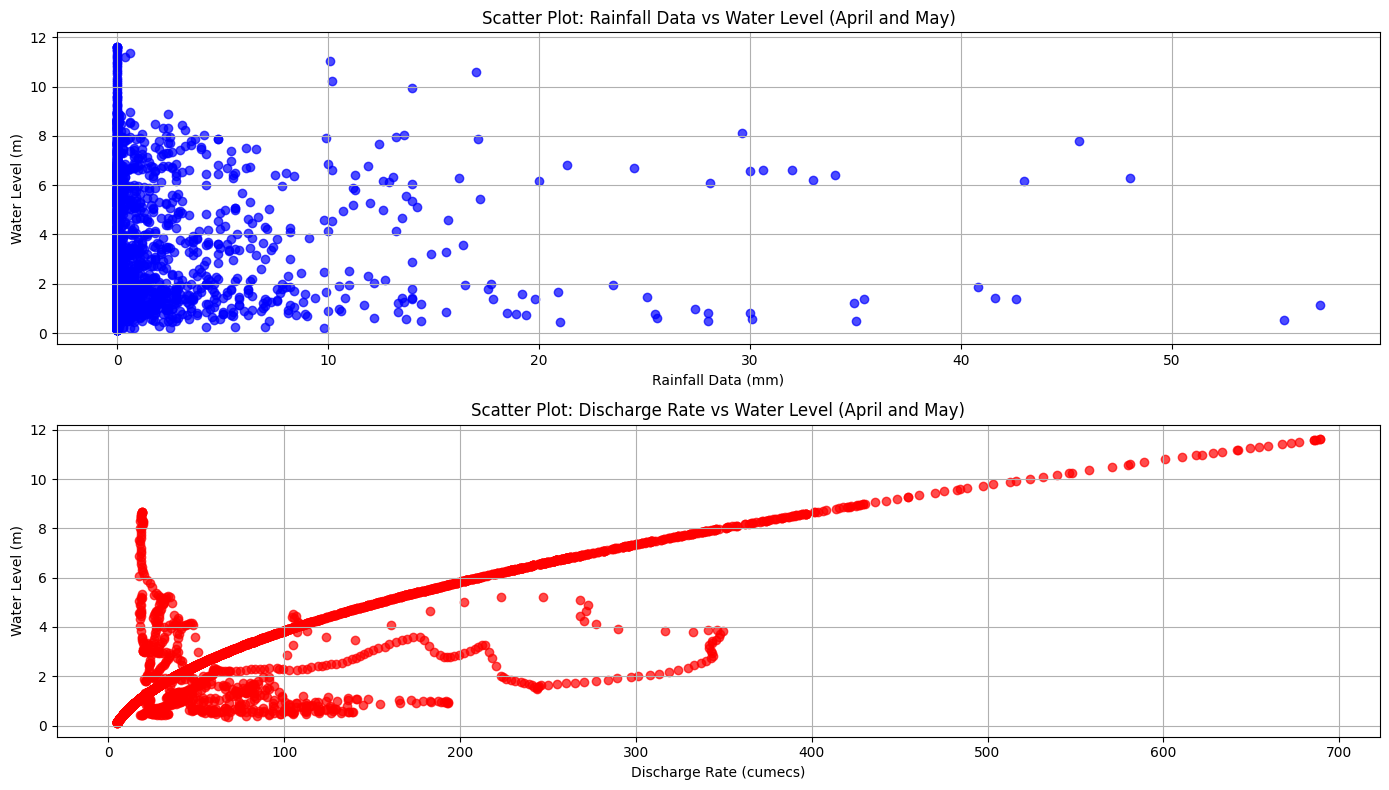

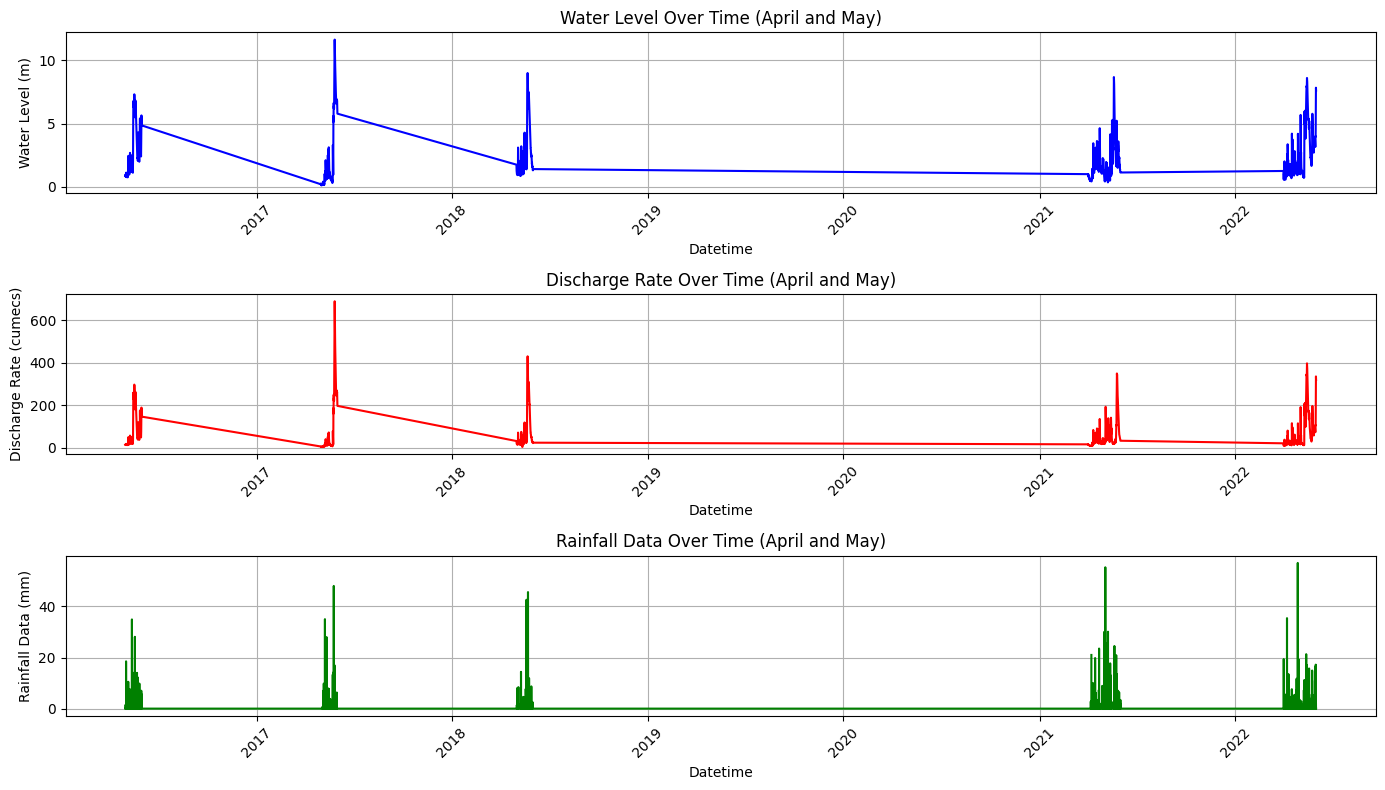

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Real Data/Flood_fyp_data.csv'
df = pd.read_csv(file_path)

# Convert the Date column into a proper datetime format (without specifying format to allow mixed formats)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')  # Let pandas infer the date format

# Ensure the Hour column is treated as integer (1-24)
df['Hour'] = df['Hour'].astype(int)

# Combine Date and Hour into a single Datetime column
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour'] - 1, unit='h')

# Filter data for the months of April (04) and May (05)
df_filtered = df[df['Date'].dt.month.isin([4, 5])]

# Scatter plots
plt.figure(figsize=(14, 8))

# Scatter plot for Water Level vs. Rainfall Data
plt.subplot(2, 1, 1)
plt.scatter(df_filtered['Rainfall Data (mm)'], df_filtered['Water Level (m)'], color='b', alpha=0.7)
plt.title('Scatter Plot: Rainfall Data vs Water Level (April and May)')
plt.xlabel('Rainfall Data (mm)')
plt.ylabel('Water Level (m)')
plt.grid(True)

# Scatter plot for Discharge Rate vs Water Level
plt.subplot(2, 1, 2)
plt.scatter(df_filtered['Discharge Rate (cumecs)'], df_filtered['Water Level (m)'], color='r', alpha=0.7)
plt.title('Scatter Plot: Discharge Rate vs Water Level (April and May)')
plt.xlabel('Discharge Rate (cumecs)')
plt.ylabel('Water Level (m)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Line charts for Water Level, Discharge Rate, and Rainfall Data over time
plt.figure(figsize=(14, 8))

# Line chart for Water Level over time
plt.subplot(3, 1, 1)
plt.plot(df_filtered['Datetime'], df_filtered['Water Level (m)'], label='Water Level (m)', color='b')
plt.title('Water Level Over Time (April and May)')
plt.xlabel('Datetime')
plt.ylabel('Water Level (m)')
plt.xticks(rotation=45)
plt.grid(True)

# Line chart for Discharge Rate over time
plt.subplot(3, 1, 2)
plt.plot(df_filtered['Datetime'], df_filtered['Discharge Rate (cumecs)'], label='Discharge Rate (cumecs)', color='r')
plt.title('Discharge Rate Over Time (April and May)')
plt.xlabel('Datetime')
plt.ylabel('Discharge Rate (cumecs)')
plt.xticks(rotation=45)
plt.grid(True)

# Line chart for Rainfall Data over time
plt.subplot(3, 1, 3)
plt.plot(df_filtered['Datetime'], df_filtered['Rainfall Data (mm)'], label='Rainfall Data (mm)', color='g')
plt.title('Rainfall Data Over Time (April and May)')
plt.xlabel('Datetime')
plt.ylabel('Rainfall Data (mm)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/Flood_fyp_data.csv'
df = pd.read_csv(file_path)

# Check for null values
print("Missing values in each column before processing:")
print(df.isnull().sum())

# Fill missing values or handle them (if any)
df.fillna(method='ffill', inplace=True)

# Define bins for water level ranges (You can modify these bins as per your requirement)
bins = [0, 2, 4, 6, 8, 10, 12, 15]  # Example bin ranges (in meters)
bin_labels = ['0-2m', '2-4m', '4-6m', '6-8m', '8-10m', '10-12m', '12-15m']

# Create a new column 'Water Level Range' based on the bins
df['Water Level Range'] = pd.cut(df['Water Level (m)'], bins=bins, labels=bin_labels, include_lowest=True)

# Count the number of occurrences in each water level range
water_level_counts = df['Water Level Range'].value_counts().sort_index()

# Print the counts
print("Water Level Counts:")
print(water_level_counts)

# Plotting the water level counts
#plt.figure(figsize=(10, 6))
#water_level_counts.plot(kind='bar', color='skyblue')
#plt.title('Count of Data According to Water Level Ranges')
#plt.xlabel('Water Level Range (m)')
#plt.ylabel('Count')
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()


Missing values in each column before processing:
Date                              0
Hour                              0
Discharge Rate (cumecs)          11
Rainfall Data (mm)              122
Water Level (m)                  23
Next 1 Hour Water Level (m)      28
Next 2 Hours Water Level (m)     33
Next 3 Hours Water Level (m)     38
dtype: int64
Water Level Counts:
Water Level Range
0-2m      3059
2-4m      1124
4-6m       469
6-8m       376
8-10m      103
10-12m      29
12-15m       0
Name: count, dtype: int64


C:\Users\Janith\AppData\Local\Temp\ipykernel_25620\3907526943.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
